# The Movie Recommender

## Packages

In [1]:
# libraries
import pandas as pd
# To ignore warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Data
rawdata = pd.read_csv('movies_metadata.csv',low_memory=False)

## View Data Set

In [57]:
# Dimension of data frame
rawdata.shape
# Create a copy (standard practice)
data = rawdata.copy()
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns.")
# data.head()

 There are 45466 rows and 24 columns.


In [58]:
# Correct the columns names & data str format
## Uppercase & replace('_', '')
data.columns = data.columns.str.capitalize()
data.columns = [str.replace('_',' ') for str in data.columns]
# data.head()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Adult                  45466 non-null  object 
 1   Belongs to collection  4494 non-null   object 
 2   Budget                 45466 non-null  object 
 3   Genres                 45466 non-null  object 
 4   Homepage               7782 non-null   object 
 5   Id                     45466 non-null  object 
 6   Imdb id                45449 non-null  object 
 7   Original language      45455 non-null  object 
 8   Original title         45466 non-null  object 
 9   Overview               44512 non-null  object 
 10  Popularity             45461 non-null  object 
 11  Poster path            45080 non-null  object 
 12  Production companies   45463 non-null  object 
 13  Production countries   45463 non-null  object 
 14  Release date           45379 non-null  object 
 15  Re

In [6]:
# To find total null value by columns
print('Total count of missing value by columns')
print()
for column in data.columns:
    if data[column].isnull().any():
        print (f"{column}", data[column].isnull().sum()) 

Total count of missing value by columns

Belongs to collection 40972
Homepage 37684
Imdb id 17
Original language 11
Overview 954
Popularity 5
Poster path 386
Production companies 3
Production countries 3
Release date 87
Revenue 6
Runtime 263
Spoken languages 6
Status 87
Tagline 25054
Title 6
Video 6
Vote average 6
Vote count 6


In [7]:
# Drop all null value selected feature
data_dropnull = data.dropna(subset = ['Title','Vote average','Vote count'])

In [8]:
data_dropnull.describe()

,Revenue,Runtime,Vote average,Vote count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


## Check Outliers

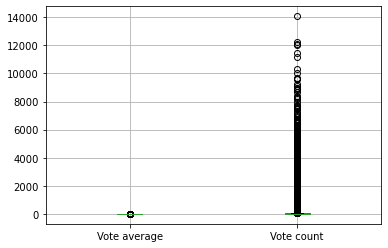

In [53]:
# Check outlier using boxplot
cols=['Vote average','Vote count']
data_dropnull.boxplot(column=cols);

In [10]:
vc_top1p = data_dropnull['Vote count'].quantile(0.99) # Top 1% Outlier Rows of UniqueSubs
vc_top1p

2183.8199999999924

In [11]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
data_nonull_remove_outlier = data_dropnull[~((data_dropnull['Vote count']>(vc_top1p)))] # Remove top 1% outliers

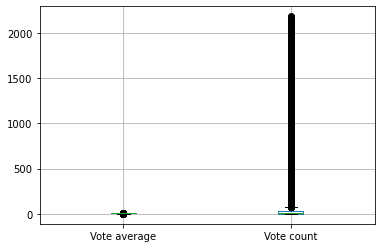

In [12]:
cols=['Vote average','Vote count'] # Initialize the column features
# plot box plot using pandas for columns "Vote average" and "Vote count"
data_nonull_remove_outlier.boxplot(column=cols); 

In [13]:
data_nonull_remove_outlier.describe() # View summary of dataset numerical variables

,Revenue,Runtime,Vote average,Vote count
count,4.500500e+04,44748.000000,45005.000000,45005.000000
mean,6.922275e+06,93.848105,5.604280,69.677702
std,3.387987e+07,38.439905,1.927387,213.039860
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,94.000000,6.000000,9.000000
75%,0.000000e+00,106.000000,6.800000,33.000000
max,1.020063e+09,1256.000000,10.000000,2183.000000


## Weighted Rating ( Bayes Estimator)
Calculation based on the IMDB formula 

WeightedRating(WR)=(voters/(voters+minimumvote)*avg_vote) + (minimumvote/(minimumvote+voters)* meanvote)

In [54]:
# To find mean vote
meanvote = data_nonull_remove_outlier['Vote average'].mean()
meanvote

5.604279524496983

In [55]:
# To find minimum vote
minimumvote = data_nonull_remove_outlier['Vote count'].quantile(0.90)
minimumvote

140.0

In [43]:
# Weighted rating call function
def weighted_rating(x, minimumvote=minimumvote, meanvote=meanvote):
    voters = x['Vote count']
    avg_vote = x['Vote average']
    return (voters/(voters+minimumvote)*avg_vote) + (minimumvote/(minimumvote+voters)* meanvote)

In [42]:
# Extract & copy data with minimumvote movie data
movie_data = data_nonull_remove_outlier.copy().loc[data_nonull_remove_outlier['Vote count'] >= minimumvote]
movie_data.shape

(4502, 25)

In [47]:
# Adding new feature score' with `weighted_rating
movie_data['Score'] = movie_data.apply(weighted_rating, axis=1)

In [56]:
# Present Score in aascending order
movie_data = movie_data.sort_values('Score', ascending=False)
movie_data[['Title','Vote count','Vote average','Score']].head(20)

,Title,Vote count,Vote average,Score
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.489013
40251,Your Name.,1030.0,8.5,8.153504
1161,12 Angry Men,2130.0,8.2,8.039912
9698,Howl's Moving Castle,2049.0,8.2,8.033988
2884,Princess Mononoke,2041.0,8.2,8.033379
5878,City of God,1852.0,8.2,8.017570
1184,Once Upon a Time in America,1104.0,8.3,7.996623
877,Rear Window,1531.0,8.2,7.982525
5857,The Pianist,1927.0,8.1,7.930962
5553,Grave of the Fireflies,974.0,8.2,7.873787


- With the result of removing the outlier the score is slightly lower compare to the Vote average. 
- It is warant to run the score again witout removing the outliers.


##  Weighted Rating ( Bayes Estimator) - Include Outlier 

In [21]:
minimumvote1 = data_dropnull['Vote count'].quantile(0.90)
minimumvote1

160.0

In [22]:
meanvote1 = data_dropnull['Vote average'].mean()
meanvote1

5.618207215133889

In [23]:
# Extract & copy data with minimumvote movie data
movie_data1 = data_dropnull.copy().loc[data_dropnull['Vote count'] >= minimumvote1]
movie_data1.shape

(4555, 24)

In [24]:
def weighted_rating(x, minimumvote1=minimumvote1, meanvote1=meanvote1):
    voters = x['Vote count']
    avg_vote = x['Vote average']
    return (voters/(voters+minimumvote1)*avg_vote) + (minimumvote1/(minimumvote1+voters)* meanvote)

In [29]:
# Adding new feature score' with `weighted_rating
movie_data1['Score'] = movie_data1.apply(weighted_rating, axis=1)

In [52]:
Movie_data1 = movie_data1.sort_values('Score', ascending=False)
Movie_data1[['Title','Vote count','Vote average','Score']].head(20)

,Title,Vote count,Vote average,Score
314,The Shawshank Redemption,8358.0,8.5,8.445608
834,The Godfather,6024.0,8.5,8.425078
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.418739
12481,The Dark Knight,12269.0,8.3,8.265298
2843,Fight Club,9678.0,8.3,8.256158
292,Pulp Fiction,8670.0,8.3,8.251153
522,Schindler's List,4436.0,8.3,8.206154
23673,Whiplash,4376.0,8.3,8.204913
5481,Spirited Away,3968.0,8.3,8.195515
2211,Life Is Beautiful,3643.0,8.3,8.186586


**This conclude that simple recommender is more accurate in scoring without removal of outliers** 

## Content-Based Recommender - Update in progress